# Instalación de dependencias

In [ ]:
# para generacion de nube de palabras
!pip install wordcloud

# Importación de Librerías

In [ ]:
#Importamos las librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# Importamos los pandasquetes necesarios
from wordcloud import WordCloud
from PIL import Image
from plotly.subplots import make_subplots


# Desarrollo del Análisis de Datos

## Recopilación de Requisitos

Para el presente ejercicio se extraen datos de las distintas redes sociales de la plataforma Social Salert, la cual nos permite recopilar contenido generado en las siguientes Redes Sociales.
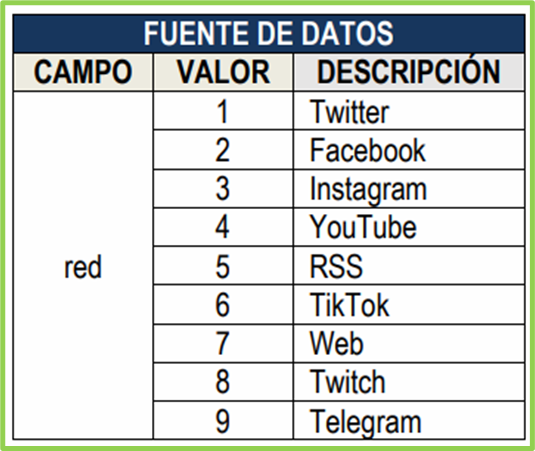

## Recolección de Datos

Para la recolección de datos se creo una consulta con palabras claves enfocadas a temas sobre marcas de autos.
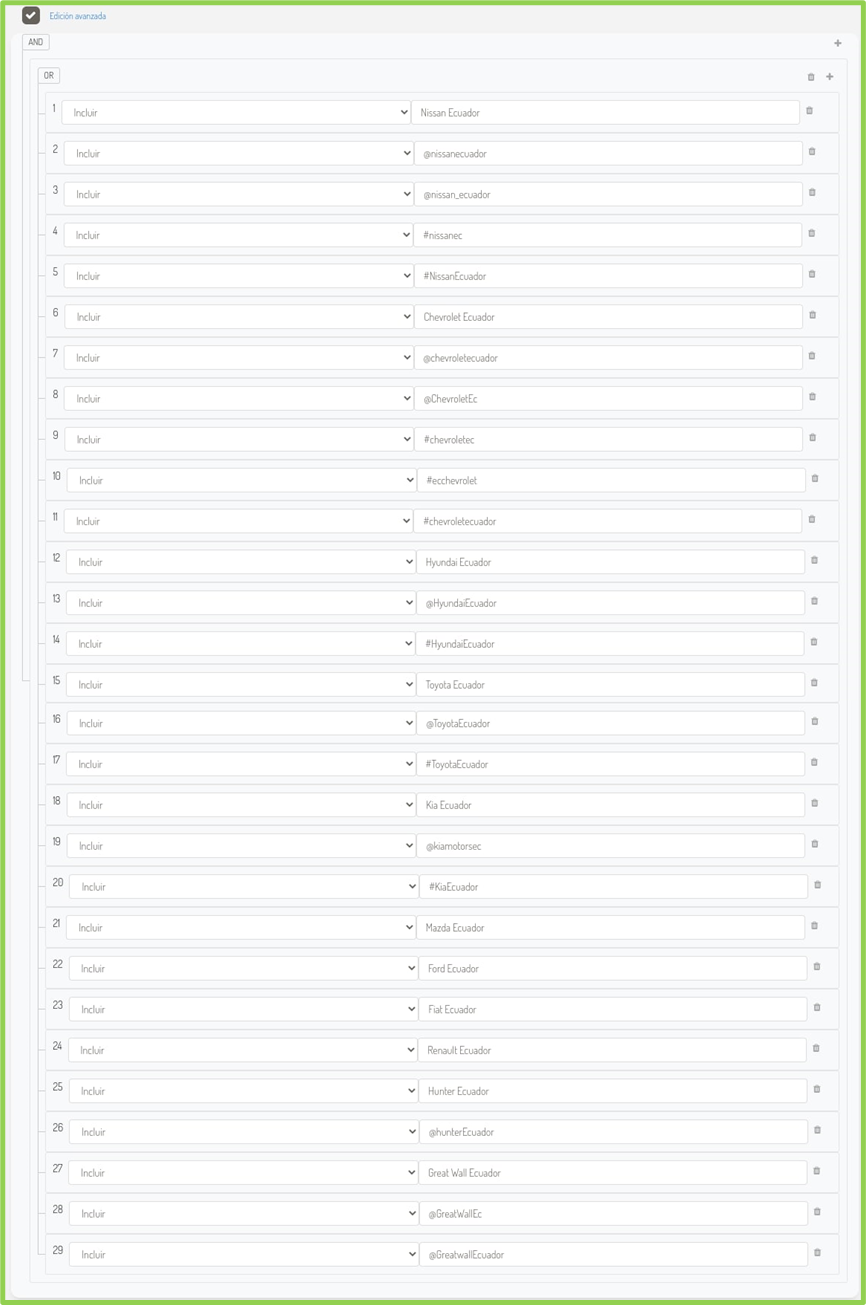

## Lectura de Datos

In [ ]:
# Método para leer archivos csv con Pandas
def leer_datos(ruta):
    df = pd.read_csv(ruta,sep=',')   
    return df

In [ ]:
# Lectura del archivo csv
autos = leer_datos("autitos.csv")
print(autos.info())
print(autos.head(3))

## Analisis de Datos

In [ ]:
# Analizar los valores de nuestro archivo para verificar si tenemos campos nulos
autos.isna().sum().sort_values()

In [ ]:
# Visualizamos en este caso las 10 primeras filas de nuestro archivo
autos.head(10)

In [ ]:
# Resumen estadístico del archivo que estamos usando
autos.describe()

## Depuración de Datos

In [ ]:
# Ordenar los datos, en este caso por fecha de creación de contenido
autos = autos.sort_values(by='created_at')

In [ ]:
# Visualizamos en este caso las 7 primeras filas de nuestro archivo ordendo por fechas
autos.head(7)

In [ ]:
# Eliminamos las columnas que no vamos a utilizar en el analisis de los datos
autos.drop(['id','comments', 'emojis', 'text', 'page_id', 'created_dmy', 'media', 'link', 'keywords', 'mentions', 'is_reply', 'is_rt', 'concepts', 'sent_personalized', 'ciudad', 'pais', 'sector', 'location', 'reply_to_id', 'user_desc', 'hashtags', 'username', 'name', 'audiencia_interaccion', 'type', 'user_id', 'views'], axis=1, inplace=True)

## Visualización de datos

In [ ]:
# Definir propiedades para un gráfico de tipo pastel.
# Se define la columna a graficar 
fig = px.pie(autos, names='red', color='red',

# Establecer colores al gráfico
            color_discrete_map={'Facebook':'#3b5998',
                                 'Instagram':'magenta',
                                 'Twitter':'#1DA1F2',
                                 'Tik Tok':'#aaaaaa',
                                 'Youtube':'#ff0000',
                                 'Web':'b6e880'})
# Colocar un título al gráfico
fig.update_layout(title_text="Publicaciones por Red Social")

# Se muestra la gráfica
fig.show()

In [ ]:
# Definir propiedades para un gráfico de tipo pastel.
# Se define la columna a graficar 
fig = px.pie(autos, values='audiencia', names='red', color='red',

# Establecer colores al gráfico
            color_discrete_map={'Facebook':'#3b5998',
                                 'Instagram':'magenta',
                                 'Twitter':'#1DA1F2',
                                 'Tik Tok':'#aaaaaa',
                                 'Youtube':'#ff0000',
                                 'Web':'b6e880'})

# Colocar un título al gráfico
fig.update_layout(title_text="Audiencia en las Redes Sociales")

# Se muestra la gráfica
fig.show()

In [ ]:
# Definir propiedades para un gráfico de sentimiento.
# Se crea un diccionario para las 4 categorias del sentimiento 
cat = {
    -1: "Negativo",
    0: "Neutro",
    1: "Positivo",
    8: "Indefinido",
}

# Se sustituye los valores con las categorias definidas
autos["sent"] = autos["sentiment"].apply(lambda x: cat.get(x))

# Se agrupa los registros por sentimiento para contabilizar las categorias 
sent = autos.groupby(["sent"], as_index=False).agg({"sentiment": "count"})

# Se define la columna a graficar y otras propiedades 
fig = px.pie(sent, values="sentiment", names="sent", hole=0.4, color="sent",
             
# Establecer colores al gráfico
             color_discrete_map={'Positivo':'#2CA02C',
                                 'Negativo':'red',
                                 'Neutro':'6366EFA',
                                 'Indefinido':'F6F926'})

# Colocar un título al gráfico
fig.update_layout(title_text="Polaridad de los comentarios")

# Se muestra la gráfica
fig.show()

In [ ]:
# Se define una tabla de gráficos de 3 filas por 2 columnas
fig = make_subplots(
    rows=3, cols=2,

# Títulos graficos individuales
    subplot_titles=("Audiencia", "Likes", "Reactions", "Shares", "Interaccion", "Ranking"))

# Se agerega el gráfico de linea de tiempo y se le ubica la posición 
fig.add_trace(go.Scatter(x=autos["created_at"], y=autos["audiencia"]), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=autos["created_at"], y=autos["likes"]), 
              row=1, col=2)

fig.add_trace(go.Scatter(x=autos["created_at"], y=autos["reactions"]), 
              row=2, col=1)

fig.add_trace(go.Scatter(x=autos["created_at"], y=autos["shares"]), 
              row=2, col=2)

fig.add_trace(go.Scatter(x=autos["created_at"], y=autos["interaccion"]), 
              row=3, col=1)

fig.add_trace(go.Scatter(x=autos["created_at"], y=autos["ranking"]), 
              row=3, col=2)

# Colocar tamaño y título a los gráficos
fig.update_layout(height=700, width=900,
                  title_text="Interacciones a través del tiempo")

# Se muestra la gráfica
fig.show()

In [ ]:
# Se define el gráfico de linea de tiempo de followers
fig = px.line(autos, x="created_at", y="followers", color="red", markers=True)

# Colocar un título al gráfico
fig.update_layout(title_text="Seguidores por Red Social a través del Tiempo")

# Se muestra la gráfica
fig.show()

In [ ]:
# Método para establecer el color de las palabras
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("#b6e880")

# Se carga una imagen como máscara de la nube de palabras
mask = np.asarray(Image.open("./carro.jpg"))

# Depuración de la variable verbos
verbs = autos[["verbs"] ]
verbs = verbs.dropna()
text = ",".join([x["verbs"] for _, x in verbs.iterrows()])

# Se instancia un objeto de tipo WordCloud con algunas propiedades
wordcloudViews = WordCloud(width = 900, height = 400, 
                background_color ='white', 
                           mode="RGBA",
                           mask=mask,
                min_font_size = 10).generate(text) # Se define los textos a graficar en la nube

# Configuración de otras propiedades para la nube de palabras
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloudViews.recolor(color_func=grey_color_func), interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Colocar un título al gráfico
plt.suptitle('Nube de Palabras Verbos', size = '16')

# Se muestra la gráfica
plt.show()

In [ ]:
# Depuración de valores nulos en las variables analizadas
netGen = autos[["red", "gen", "likes"]]
netGen.fillna("U", inplace=True)

# Se definen propiedades para el gráfico
fig = px.sunburst(netGen, path=['red', 'gen'], values='likes', color='red',
                  
# Establecer colores al gráfico
            color_discrete_map={'Facebook':'#3b5998',
                                 'Instagram':'magenta',
                                 'Twitter':'#1DA1F2',
                                 'Tik Tok':'#aaaaaa',
                                 'Youtube':'#ff0000',
                                 'Web':'#b6e880'})

# Colocar un título al gráfico
fig.update_layout(title_text="Cantidad de Likes por Género y Red Social")

# Se muestra la gráfica
fig.show()